In [2]:
from sklearn import datasets
import numpy as np

# KNN algorithm model
# get dataset_iris from sklearn 
data, labels = datasets.load_iris(return_X_y=True, as_frame=False)

# there are 4 features, so it is 4-dimensional dataset 
print(data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [50]:
# data processing, training / test rate = 7 / 3
random_seed = 1
thresh = 0.7

rng =  np.random.default_rng(random_seed)
# random_probs = rng.random((labels.shape[0], ))
random_probs = rng.random(len(labels))

training_data = data[random_probs <= thresh, :]
training_labels = labels[random_probs <= thresh]
test_data = data[random_probs > thresh, :]
test_labels = labels[random_probs > thresh]

print("training_data : test_data = {} : {}". format(len(training_data), len(test_data)))

training_data : test_data = 104 : 46


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(training_data, training_labels)
predictions = knn_model.predict(test_data)

print("accuracy rate: ", accuracy_score(test_labels, predictions))

accuracy rate:  0.9782608695652174


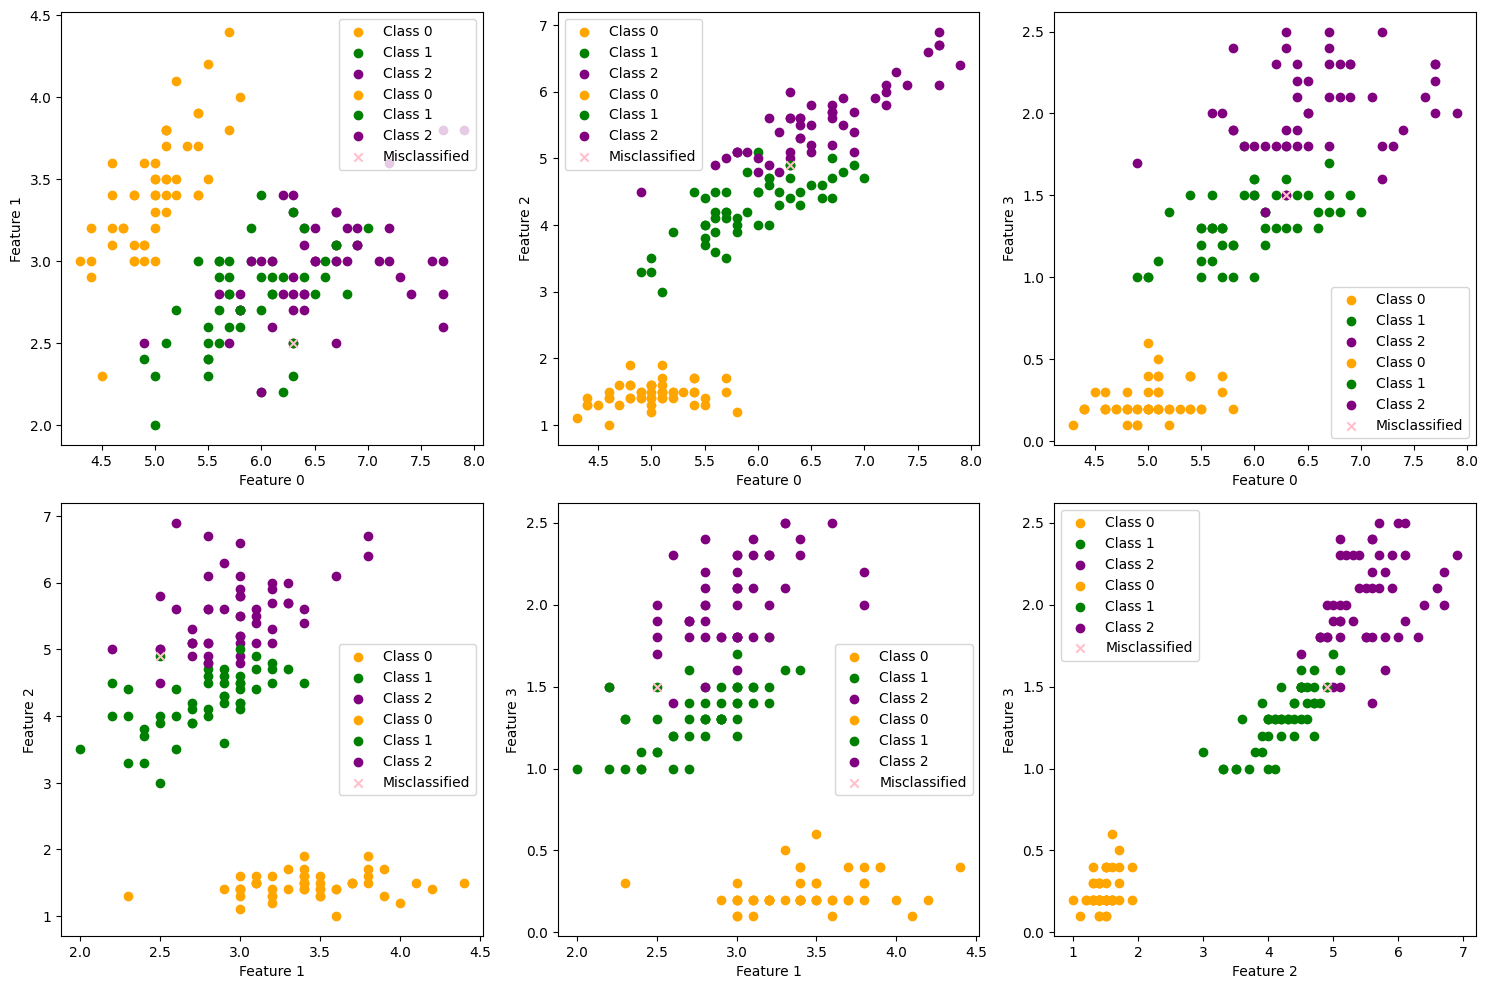

In [52]:
import matplotlib.pyplot as plt

def plot_by_class(ax, data1, data2, labels, marker='o'):
    class_0 = labels == 0
    ax.scatter(data1[class_0], data2[class_0], color="orange", marker=marker, label="Class 0")
    
    class_1 = labels == 1
    ax.scatter(data1[class_1], data2[class_1], color="green", marker=marker, label="Class 1")
    
    class_2 = labels == 2
    ax.scatter(data1[class_2], data2[class_2], color="purple", marker=marker, label="Class 2")

    return ax

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (f1, f2) in enumerate(feature_combinations):
    
    # ax = axs[0, 0], axs[0, 1]..., axs[ , ] is the grid of sub figure
    ax = axs[i // 3, i % 3]

    ax = plot_by_class(ax, training_data[:, f1], training_data[:, f2], training_labels, marker='o')
    
    ax = plot_by_class(ax, test_data[:, f1], test_data[:, f2], test_labels, marker='o')
    
    incorrect_pred = test_labels != predictions
    
    ax.scatter(test_data[incorrect_pred, f1], test_data[incorrect_pred, f2], color="pink", marker='x', label="Misclassified")
    
    ax.set_xlabel("Feature {}". format(f1))
    ax.set_ylabel("Feature {}". format(f2))
    ax.legend()

plt.tight_layout()
plt.show()

When selecting the value of K, it typically starts from 1 and gradually increases, usually not exceeding 20. If the value of K is too small, it means lower sensitivity to noise and a higher risk of overfitting, resulting in a more complex model. On the other hand, as the value of K increases, it means more points are considered for judgment, which may lead to underfitting and a simpler model.
